<a href="https://colab.research.google.com/github/mary-ts/Neural-Computing/blob/tito/ooptito_of_xceptionGoodFruity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras.layers as layers
from keras import Sequential
import keras.models
from keras.layers import *
from keras.models import * 
from keras import optimizers, applications
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import KFold

Dataset Paths

In [4]:
train_path = "/content/drive/MyDrive/archive (1)/train/train"
test_path = "/content/drive/MyDrive/archive (1)/test/test"

Creating training and test data

In [5]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split = 0.2
)
test_datagen= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

Importing data into generators

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (299,299),
    batch_size = 32,
    class_mode = 'categorical', 
    shuffle=True)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (299,299),
    batch_size = 32,
    shuffle=True,
    class_mode = 'categorical')

Found 16854 images belonging to 33 classes.
Found 0 images belonging to 0 classes.


In [7]:
train_data = pd.read_csv('/content/drive/MyDrive/archive (1)/sampleSubmission.csv')
Y = train_data[['label']]

kf = KFold(n_splits = 5)

Xception Model

In [29]:
model = applications.Xception(weights='imagenet', 
                              include_top=False, 
                              input_shape=(299, 299, 3))

for layer in model.layers:
    layer.trainable = False

x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(.3)(x)
predictions = Dense(33, activation="softmax")(x)
model_final = Model(model.input, predictions)

model_final.compile(optimizers.RMSprop(learning_rate=0.0001, decay=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model_final.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [30]:
for layer in model_final.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fbf3049a690> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fbf304b6a10> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbf30355410> False
<keras.layers.core.activation.Activation object at 0x7fbf304eea90> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fbf30355c50> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbf30355150> False
<keras.layers.core.activation.Activation object at 0x7fbf302ced10> False
<keras.layers.convolutional.separable_conv2d.SeparableConv2D object at 0x7fbf3049af50> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fbed6040fd0> False
<keras.layers.core.activation.Activation object at 0x7fbed6040c10> False
<keras.layers.convolutional.separable_conv2d.SeparableConv2D object at 0x7fbed604db10> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f


      VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

save_dir = '/saved_models/'
fold_var = 4

# LOAD BEST MODEL to evaluate the performance of the model
#model.load_weights("/content/drive/MyDrive/archive (1)/val"+str(fold_var)+".h5")

model.compile(optimizers.RMSprop(learning_rate=0.0001, decay=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
results = model.evaluate(test_datagen)
results = dict(zip(model.metrics_names,results))
	
VALIDATION_ACCURACY.append(results['accuracy'])
VALIDATION_LOSS.append(results['loss'])
	
tf.keras.backend.clear_session()
	
fold_var += 1

Xception


In [ ]:
checkpoint = ModelCheckpoint("xception", monitor='loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='loss', min_delta=0.0001, patience=7, verbose=2, mode='auto')
hist = model_final.fit(train_generator,                   
                                    steps_per_epoch=150,
                                    validation_data=test_generator,                    
                                    validation_steps=10,
                                    epochs=5,
                                    callbacks = [checkpoint, early],
                                    verbose=1)

Epoch 1/5
150/150 [==============================] - ETA: 0s - loss: 2.1322 - accuracy: 0.4613
Epoch 1: loss improved from inf to 2.13219, saving model to xception


150/150 [==============================] - 132s 878ms/step - loss: 2.1322 - accuracy: 0.4613
Epoch 2/5
150/150 [==============================] - ETA: 0s - loss: 2.1264 - accuracy: 0.4551
Epoch 2: loss improved from 2.13219 to 2.12635, saving model to xception


150/150 [==============================] - 133s 883ms/step - loss: 2.1264 - accuracy: 0.4551
Epoch 3/5
150/150 [==============================] - ETA: 0s - loss: 2.1162 - accuracy: 0.4583
Epoch 3: loss improved from 2.12635 to 2.11620, saving model to xception


150/150 [==============================] - 132s 878ms/step - loss: 2.1162 - accuracy: 0.4583
Epoch 4/5
150/150 [==============================] - ETA: 0s - loss: 2.1260 - accuracy: 0.4569
Epoch 4: loss did not improve from 2.11620
150/150 [==============================] - 109s 724ms/step - loss: 2.1260 - accuracy: 0.4569


Plot Xception

KeyError: ignored

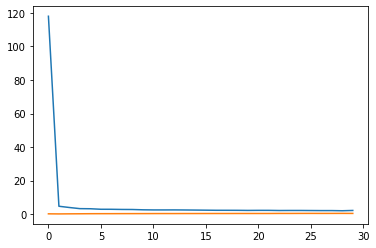

In [34]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"])
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_loss"])
plt.plot(hist.history["val_accuracy"])
plt.legend(["accuracy", "val_accuracy"])
plt.show()

In [ ]:
import tensorflow as tf
from tf.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data.shape, test_data.shape

plt.imshow(train_data[0])

train_data = train_data/255.0
test_data = test_data/255.0

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, test_data, test_labels)
